<ipython-input-7-7e0d5c38c283>:13: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(url, header=0, parse_dates=[0], index_col=0, date_parser=pd.to_datetime)


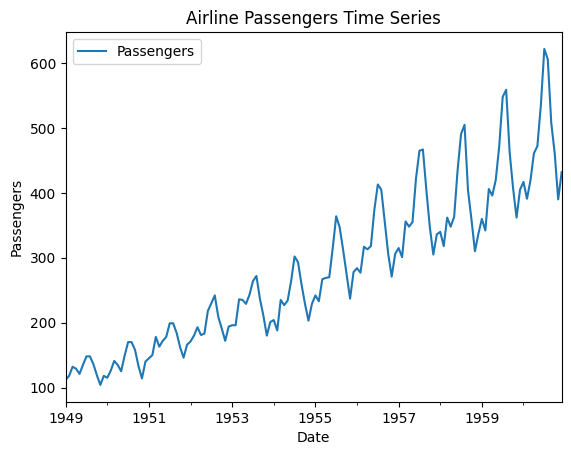

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.1756 - val_loss: 0.4862
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1026 - val_loss: 0.3130
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0604 - val_loss: 0.1985
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0372 - val_loss: 0.1180
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0231 - val_loss: 0.0630
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0108 - val_loss: 0.0306
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0064 - val_loss: 0.0157
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0048 - val_loss: 0.0128
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0041 - val_loss: 0.0135
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0040 - val_loss: 0.0131
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037 - val_loss: 0.0131
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039 - val_loss: 0.0134


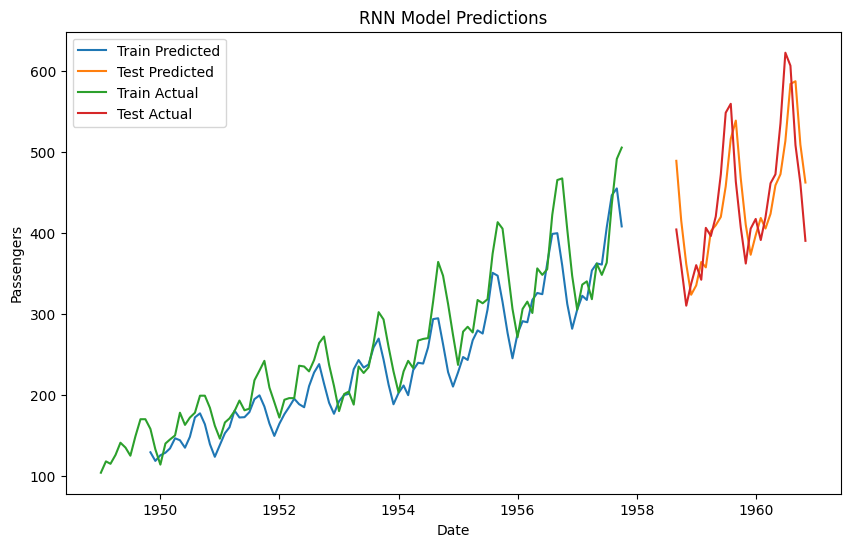

In [7]:
# 1. Import Requisite Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

# 2. Load any time series dataset (For this example, using a sample time-series dataset)
# You can replace this with your own dataset (e.g., stock prices, weather data, etc.)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, header=0, parse_dates=[0], index_col=0, date_parser=pd.to_datetime)

# 3. Pre-process and visualize the dataset
data.plot()
plt.title('Airline Passengers Time Series')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.show()

# MinMax scaling to normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))

# 4. Form the Training and Testing Data
# Create a function to prepare the data for RNN
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        y.append(dataset[i+time_step, 0])
    return np.array(X), np.array(y)

# Define the time step (number of previous time steps to consider)
time_step = 10
X, y = create_dataset(data_scaled, time_step)

# Reshape X to be in the format [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets (80% for training, 20% for testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 5. Develop and train the model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(time_step, 1)))
model.add(Dense(1))  # Output layer with 1 unit
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# 6. Plot the predictions for training and testing data
# Predict the values for the training and testing data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions back to original scale
train_predict = scaler.inverse_transform(train_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting the predictions
plt.figure(figsize=(10, 6))

# Plot Train data (adjust the index to match the length of predictions)
plt.plot(data.index[time_step:train_size], train_predict[:len(data.index[time_step:train_size])], label='Train Predicted')

# Plot Test data (adjust the index and predictions to match the length)
plt.plot(data.index[train_size+time_step:train_size+time_step+len(test_predict)], test_predict, label='Test Predicted')

# Plot Actual data for Train and Test (adjust the index range for Test Actual)
plt.plot(data.index[:train_size], y_train_actual, label='Train Actual')
plt.plot(data.index[train_size+time_step:train_size+time_step+len(y_test_actual)], y_test_actual, label='Test Actual')

plt.title('RNN Model Predictions')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()
